# **Business Context**

Bank XYZ ingin mendeteksi transaksi bernilai tidak wajar (outlier) pada segmen nasabah prioritas untuk:

* meningkatkan pengawasan risiko
* mencegah potensi fraud
* memahami karakteristik nasabah high-value



# **Business Questions**
*   Siapa nasabah dengan total transaksi tertinggi?
*   Produk & channel apa yang paling sering digunakan nasabah prioritas?
*   Cabang/wilayah mana dengan transaksi bernilai terbesar?
*   Apakah terdapat transaksi outlier yang signifikan?
*   Bagaimana profil demografi nasabah dengan transaksi besar?
*   Identifikasi nasabah potensi fraud








# **Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Customers Dataset

In [ ]:
customers = pd.read_excel('/content/drive/MyDrive/Data Analyst/Project/Fraud Bank/customer.xlsx')

In [ ]:
customers.info()

display(customers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  3000 non-null   object
 1   full_name    3000 non-null   object
 2   gender       3000 non-null   object
 3   age          3000 non-null   int64 
 4   province     3000 non-null   object
 5   segment      3000 non-null   object
 6   avg_balance  3000 non-null   int64 
 7   cc_limit     3000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 187.6+ KB


,customer_id,full_name,gender,age,province,segment,avg_balance,cc_limit
0,C2_000001,Mitra Najmudin,L,53,Bali,Priority,995397863,50000000
1,C2_000002,Panji Lailasari,L,52,Jawa Barat,Priority,688798071,100000000
2,C2_000003,Kariman Thamrin,P,41,Bali,Priority,674042970,20000000
3,C2_000004,Darmaji Dabukke,L,26,DKI Jakarta,Priority,771146801,50000000
4,C2_000005,Irnanto Namaga,P,30,Riau,Priority,785373995,50000000


In [ ]:
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.describe()

,age,avg_balance,cc_limit
count,3000.0000,3.000000e+03,3.000000e+03
mean,44.5820,5.268489e+08,5.630667e+07
std,11.6247,2.731344e+08,3.323744e+07
min,25.0000,5.020419e+07,2.000000e+07
25%,34.0000,2.927568e+08,2.000000e+07
50%,45.0000,5.237413e+08,5.000000e+07
75%,55.0000,7.631134e+08,1.000000e+08
max,64.0000,9.998713e+08,1.000000e+08


In [ ]:
customers['segment'].unique().tolist()

['Priority']

In [ ]:
# Karena dataset customer menunjukkan bawah segment berisi nasabah prioritas semua
# Maka akan dihapus fitur tersebut

customers.drop('segment', axis=1, inplace=True)

In [ ]:
customers['province'].unique().tolist()

['Bali',
 'Jawa Barat',
 'DKI Jakarta',
 'Riau',
 'Sulawesi Selatan',
 'Sumatera Utara',
 'Sumatera Barat',
 'DI Yogyakarta',
 'Jawa Tengah',
 'Jawa Timur']

## Transaction Dataset

In [ ]:
transactions = pd.read_excel('/content/drive/MyDrive/Data Analyst/Project/Fraud Bank/transaction.xlsx')

In [ ]:
transactions.info()

display(transactions.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    8000 non-null   object        
 1   customer_id       8000 non-null   object        
 2   product_name      8000 non-null   object        
 3   channel           8000 non-null   object        
 4   branch_id         8000 non-null   object        
 5   transaction_date  8000 non-null   datetime64[ns]
 6   amount            8000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 437.6+ KB


,transaction_id,customer_id,product_name,channel,branch_id,transaction_date,amount
0,T2_000154,C2_001832,Deposito,Teller,B2_026,2025-05-03,498517946
1,T2_000175,C2_000017,Tabungan,Teller,B2_030,2024-05-26,497269804
2,T2_000413,C2_001261,Tabungan,ATM,B2_021,2025-05-16,499990391
3,T2_000541,C2_000034,Kredit Mikro,Internet Banking,B2_023,2023-05-22,496567056
4,T2_000710,C2_002882,Kredit Mikro,Mobile Banking,B2_015,2023-01-07,497805492


In [ ]:
transactions.duplicated().sum()

np.int64(0)

In [ ]:
transactions.describe()

,transaction_date,amount
count,8000,8.000000e+03
mean,2024-04-28 08:21:18.000000256,2.525406e+08
min,2023-01-01 00:00:00,1.126073e+06
25%,2023-08-25 00:00:00,1.250708e+08
50%,2024-04-25 00:00:00,2.555532e+08
75%,2025-01-02 00:00:00,3.775740e+08
max,2025-08-30 00:00:00,4.999904e+08
std,NaN,1.451275e+08


In [ ]:
transactions['channel'].unique().tolist()

['Teller', 'ATM', 'Internet Banking', 'Mobile Banking', 'EDC']

In [ ]:
transactions['product_name'].unique().tolist()

['Deposito', 'Tabungan', 'Kredit Mikro', 'Kredit Konsumer', 'Kartu Kredit']

## Join Dataset

In [ ]:
df = transactions.merge(customers, how='left', on='customer_id')

In [ ]:
df.info()

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    8000 non-null   object        
 1   customer_id       8000 non-null   object        
 2   product_name      8000 non-null   object        
 3   channel           8000 non-null   object        
 4   branch_id         8000 non-null   object        
 5   transaction_date  8000 non-null   datetime64[ns]
 6   amount            8000 non-null   int64         
 7   full_name         8000 non-null   object        
 8   gender            8000 non-null   object        
 9   age               8000 non-null   int64         
 10  province          8000 non-null   object        
 11  avg_balance       8000 non-null   int64         
 12  cc_limit          8000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 812.6+ KB


,transaction_id,customer_id,product_name,channel,branch_id,transaction_date,amount,full_name,gender,age,province,avg_balance,cc_limit
0,T2_000154,C2_001832,Deposito,Teller,B2_026,2025-05-03,498517946,"Bahuwarna Astuti, S.Farm",L,44,Riau,650620539,50000000
1,T2_000175,C2_000017,Tabungan,Teller,B2_030,2024-05-26,497269804,Elisa Pratiwi,L,56,Sulawesi Selatan,670296648,100000000
2,T2_000413,C2_001261,Tabungan,ATM,B2_021,2025-05-16,499990391,Umi Sihombing,P,61,Bali,523643290,100000000
3,T2_000541,C2_000034,Kredit Mikro,Internet Banking,B2_023,2023-05-22,496567056,Johan Adriansyah,L,44,Jawa Barat,579307382,50000000
4,T2_000710,C2_002882,Kredit Mikro,Mobile Banking,B2_015,2023-01-07,497805492,Aslijan Hidayanto,P,46,DKI Jakarta,505273511,100000000


# **Exploratory Data Analysis**

## Nasabah dengan total transaksi tertinggi

In [ ]:
# Total nilai transaksi per nasabah
high_value_transaction = (
    df.groupby(['customer_id', 'full_name'], as_index=False)
      .agg(total_transaction_amount=('amount', 'sum'))
      .sort_values(by='total_transaction_amount', ascending=False)
)

display(high_value_transaction)

,customer_id,full_name,total_transaction_amount
2045,C2_002194,Gawati Putra,2995183932
1399,C2_001506,drg. Hasan Waluyo,2943453496
2040,C2_002189,Lurhur Gunawan,2750849923
2168,C2_002327,Vanya Dongoran,2690276070
2018,C2_002163,Lurhur Narpati,2620183297
...,...,...,...
332,C2_000363,Gabriella Irawan,6501550
1837,C2_001976,Banawi Wibisono,6061206
1534,C2_001650,Victoria Prastuti,4665275
2537,C2_002723,"dr. Padma Winarno, S.Farm",4609059


/tmp/ipython-input-3168458318.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


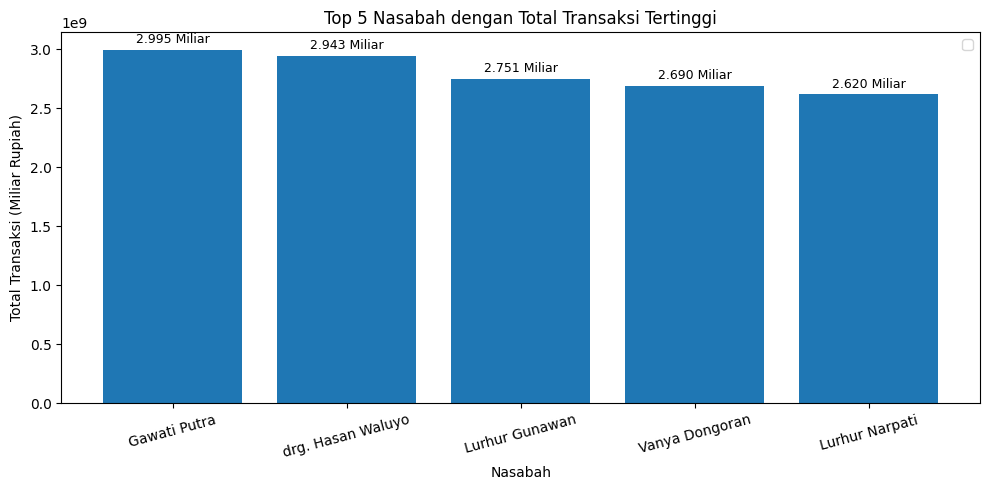

In [ ]:
top5_customer = high_value_transaction.head(5)

plt.figure(figsize=(10,5))
barplot = plt.bar(top5_customer['full_name'], top5_customer['total_transaction_amount'])
plt.xticks(rotation=15)
plt.title('Top 5 Nasabah dengan Total Transaksi Tertinggi')
plt.xlabel('Nasabah')
plt.ylabel('Total Transaksi (Miliar Rupiah)')

# Add data labels on top of the bars
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (plt.gca().get_ylim()[1] * 0.01),
             f'{yval/1_000_000_000:.3f} Miliar', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

* **Insight:**

Lima nasabah dengan total transaksi tertinggi memiliki nilai transaksi yang relatif berdekatan, dengan nilai tertinggi mencapai hampir Rp3 miliar. Hal ini menunjukkan bahwa pada segmen nasabah prioritas, terdapat beberapa nasabah dengan kontribusi transaksi yang sama-sama besar, tanpa perbedaan yang sangat ekstrem antar individu.

## Produk & channel apa yang paling sering digunakan nasabah prioritas?

In [ ]:
#Produk serta presentasenya yang paling sering digunakan nasabah prioritas
produk_counts = (df
                 .groupby(by='product_name', as_index=False)
                 .agg(jumlah=('product_name','count'))
                 ).sort_values(by='jumlah', ascending=False)

produk_counts["persentase"] = (produk_counts["jumlah"] / produk_counts["jumlah"].sum() * 100).round(2)

display(produk_counts)

print(50*'=')
top_product = produk_counts.iloc[0]
print(f"Produk paling sering digunakan: {top_product['product_name']} — {top_product['jumlah']} transaksi ({top_product['persentase']}%)")

,product_name,jumlah,persentase
4,Tabungan,1679,20.99
2,Kredit Konsumer,1627,20.34
0,Deposito,1583,19.79
1,Kartu Kredit,1573,19.66
3,Kredit Mikro,1538,19.23


Produk paling sering digunakan: Tabungan — 1679 transaksi (20.99%)


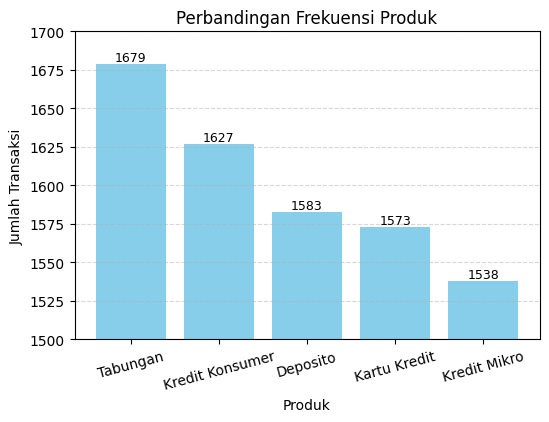

In [ ]:
plt.figure(figsize=(6,4))
barplot_product = plt.bar(produk_counts["product_name"], produk_counts["jumlah"], color="skyblue")
plt.title("Perbandingan Frekuensi Produk")
plt.xlabel("Produk")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.ylim(1500, 1700)

# Add data labels on top of the bars
for bar in barplot_product:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval}', ha='center', va='bottom', fontsize=9)


plt.show()

* **Insight:**

Produk tabungan menjadi produk dengan frekuensi transaksi tertinggi pada nasabah prioritas (1.679 transaksi atau 20,99%). Namun, distribusi frekuensi antar produk relatif merata, yang menunjukkan bahwa nasabah prioritas memanfaatkan berbagai jenis produk secara seimbang, tidak terfokus pada satu produk saja.

In [ ]:
#Channel serta presentasenya yang paling sering digunakan nasabah prioritas
channel_counts = (df
                  .groupby(by = 'channel', as_index = False)
                  .agg(jumlah = ('channel','count'))
                  ).sort_values(by ='jumlah', ascending=False)

channel_counts["persentase"] = (channel_counts["jumlah"] / channel_counts["jumlah"].sum() * 100).round(2)

display(channel_counts)

print (50*'=')
top_channel = channel_counts.iloc[0]

print(f"Channel paling sering digunakan: {top_channel['channel']} — {top_channel['jumlah']} transaksi ({top_channel['persentase']}%)")

,channel,jumlah,persentase
4,Teller,1625,20.31
1,EDC,1605,20.06
2,Internet Banking,1602,20.03
0,ATM,1593,19.91
3,Mobile Banking,1575,19.69


Channel paling sering digunakan: Teller — 1625 transaksi (20.31%)


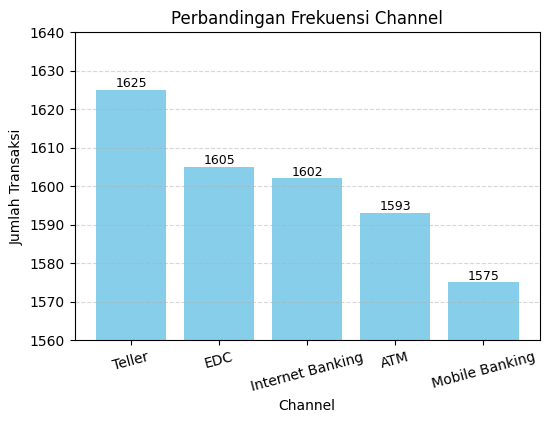

In [ ]:
plt.figure(figsize=(6,4))
barplot_channel = plt.bar(channel_counts["channel"], channel_counts["jumlah"], color="skyblue")
plt.title("Perbandingan Frekuensi Channel")
plt.xlabel("Channel")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.ylim(1560, 1640)

# Add data labels on top of the bars
for bar in barplot_channel:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{yval}', ha='center', va='bottom', fontsize=9)

plt.show()

* **Insight:**

Channel teller memiliki frekuensi transaksi tertinggi (1.625 transaksi atau 20,31%), diikuti oleh channel digital dengan selisih yang relatif kecil. Hal ini menunjukkan bahwa meskipun transaksi tatap muka masih penting bagi nasabah prioritas, channel digital juga telah menjadi bagian signifikan dalam aktivitas transaksi mereka.

## 3. Cabang / wilayah dengan transaksi bernilai terbesar

In [ ]:
# Branch dan Province dengan Nilai Transaksi tersebesar
branch_province_df = (df
                      .groupby(['branch_id', 'province'], as_index=False)
                      .agg(min_transaction=('amount','min'), max_transaction =('amount','max'), avg_transaction=('amount','mean'))
                      ).sort_values(by = 'max_transaction',ascending=False)
display(branch_province_df)

,branch_id,province,min_transaction,max_transaction,avg_transaction
200,B2_021,Bali,3156093,499990391,2.442088e+08
196,B2_020,Riau,2881357,499959512,2.395304e+08
8,B2_001,Sumatera Barat,12563171,499948182,2.541070e+08
134,B2_014,Jawa Tengah,31255744,499907782,2.513554e+08
125,B2_013,Jawa Timur,23689447,499892688,2.175844e+08
...,...,...,...,...,...
218,B2_022,Sumatera Barat,4790005,424478287,2.287055e+08
173,B2_018,Jawa Barat,12686010,423663853,2.285664e+08
5,B2_001,Jawa Timur,10290299,419114729,1.847645e+08
52,B2_006,DKI Jakarta,48000458,390577458,2.523492e+08


In [ ]:
top_5_branch_province = branch_province_df.iloc[0:5]
top_5_branch_province

,branch_id,province,min_transaction,max_transaction,avg_transaction
200,B2_021,Bali,3156093,499990391,2.442088e+08
196,B2_020,Riau,2881357,499959512,2.395304e+08
8,B2_001,Sumatera Barat,12563171,499948182,2.541070e+08
134,B2_014,Jawa Tengah,31255744,499907782,2.513554e+08
125,B2_013,Jawa Timur,23689447,499892688,2.175844e+08


/tmp/ipython-input-989164370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_branch_province['branch_province'] = top_5_branch_province['branch_id'] + ' (' + top_5_branch_province['province'] + ')'
/tmp/ipython-input-989164370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_branch_province['nilai_juta'] = top_5_branch_province['max_transaction'] / 1_000_000
/tmp/ipython-input-989164370.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

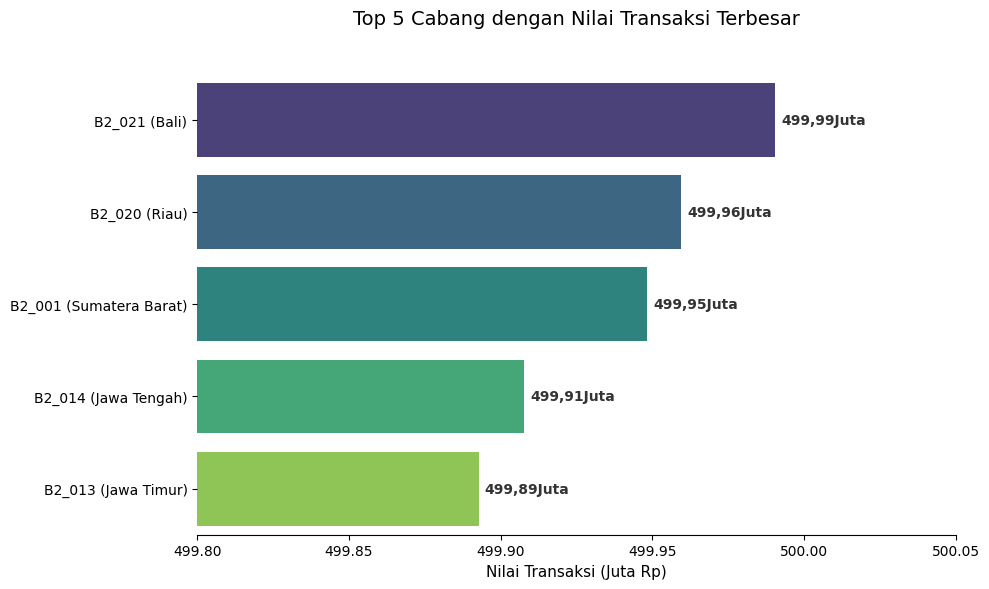

In [ ]:
# 1. PERSIAPAN DATA
# Gabungkan nama cabang dan provinsi
top_5_branch_province['branch_province'] = top_5_branch_province['branch_id'] + ' (' + top_5_branch_province['province'] + ')'

# Konversi angka ke "Juta Rupiah" agar lebih pendek dan mudah dibaca
top_5_branch_province['nilai_juta'] = top_5_branch_province['max_transaction'] / 1_000_000


plt.figure(figsize=(10, 6))

# --- 2. VISUALISASI ---
ax = sns.barplot(
    x='nilai_juta',
    y='branch_province',
    data=top_5_branch_province,
    palette='viridis'
)

plt.xlim(499.8, 500.05)
plt.title('Top 5 Cabang dengan Nilai Transaksi Terbesar\n', fontsize=14, pad=20)
plt.xlabel('Nilai Transaksi (Juta Rp)', fontsize=11)
plt.ylabel('', fontsize=11)

sns.despine(left=True, bottom=False)

for p in ax.patches:
    width = p.get_width()
    label = f"{width:.2f}".replace('.', ',')
    plt.text(
        width + 0.002,
        p.get_y() + p.get_height()/2,
        f'{label}Juta',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold',
        color='#333333')

plt.tight_layout()
plt.show()

* **Insight:**

Cabang B2_021 (Bali) mencatat nilai transaksi tertinggi, namun selisih dengan cabang lain dalam TOP 5 relatif kecil, dengan seluruhnya berada di kisaran Rp 499 juta. Hal ini menunjukkan bahwa aktivitas transaksi bernilai besar tersebar secara relatif merata di beberapa wilayah utama, tanpa dominasi yang signifikan dari satu cabang tertentu.

## 4. Deteksi outlier pada jumlah transaksi

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['is_outlier'] = (df['amount'] < lower_bound) | (df['amount'] > upper_bound)

df['is_outlier'].value_counts()

,count
is_outlier,
False,8000


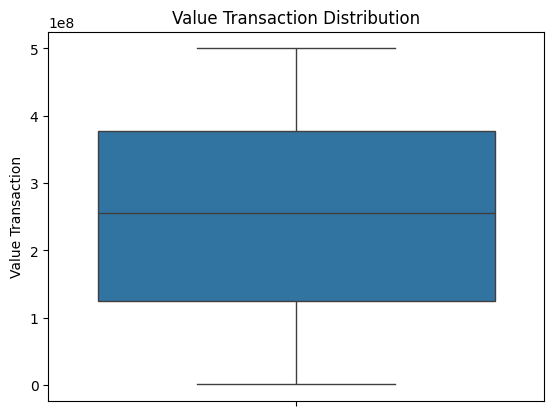

In [ ]:
sns.boxplot(y=df['amount'])
plt.title('Distribusi Nilai Transaksi')
plt.ylabel('Nilai Transaksi')
plt.show()

* **Insight:**

Distribusi nilai transaksi nasabah prioritas menunjukkan variasi yang besar, namun seluruh transaksi masih berada dalam batas kewajaran berdasarkan pendekatan statistik IQR. Hal ini mengindikasikan bahwa transaksi bernilai tinggi merupakan perilaku yang normal pada segmen nasabah prioritas, bukan merupakan anomali ekstrem.

## 5. Profil demografi nasabah yang sering transaksi besar

In [ ]:
# Baseline nilai transaksi
global_avg_transaction = df['amount'].mean()

customer_behavior = (
    df.groupby('customer_id')
      .agg(
          avg_transaction=('amount', 'mean'),
          transaction_count=('amount', 'count')
      )
      .reset_index()
)

#threshold "sering transaksi" menggunakan median
freq_threshold = customer_behavior['transaction_count'].median()

#dikatakan besar jika rasio rata-rata transaksi nasabah dengan rata-rata global sebesar 1,5
customer_behavior['frequent_big_transaction'] = (
    (customer_behavior['avg_transaction'] / global_avg_transaction >= 1.5) &
    (customer_behavior['transaction_count'] >= freq_threshold)
)

frequent_big_customers = customer_behavior[
    customer_behavior['frequent_big_transaction']
]

#demografi nasabah
customer_demography = (
    df[['customer_id', 'gender', 'age', 'province']]
    .drop_duplicates()
)

nasabah_gokil = frequent_big_customers.merge(
    customer_demography,
    on='customer_id',
    how='left'
)


In [ ]:
nasabah_gokil

,customer_id,avg_transaction,transaction_count,frequent_big_transaction,gender,age,province
0,C2_000006,4.184400e+08,3,True,L,49,Sulawesi Selatan
1,C2_000010,4.021394e+08,3,True,L,58,Sumatera Barat
2,C2_000073,3.789045e+08,3,True,P,27,Riau
3,C2_000123,4.370960e+08,4,True,P,51,Riau
4,C2_000162,4.067334e+08,4,True,P,53,Jawa Timur
...,...,...,...,...,...,...,...
75,C2_002701,4.070493e+08,3,True,P,64,Jawa Timur
76,C2_002705,3.995122e+08,3,True,P,39,Riau
77,C2_002817,4.068990e+08,5,True,L,43,Bali
78,C2_002877,3.940038e+08,6,True,P,64,Bali


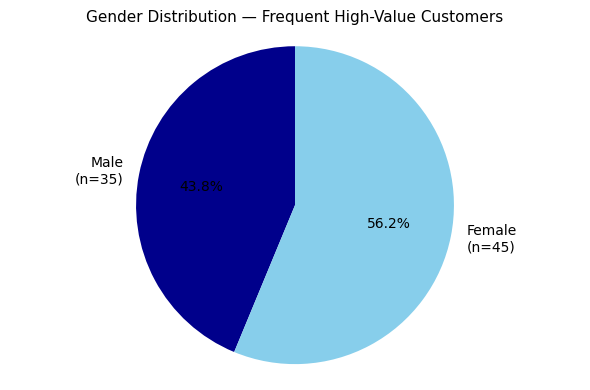

In [ ]:
# Hitung distribusi gender (%)
gender_dist_pct = nasabah_gokil['gender'].value_counts(normalize=True).sort_index() * 100
gender_dist_cnt = nasabah_gokil['gender'].value_counts().sort_index()

# Mapping label agar lebih jelas
gender_labels = {
    'L': 'Male',
    'P': 'Female'
}

labels = [
    f"{gender_labels.get(g, g)}\n(n={gender_dist_cnt[g]})"
    for g in gender_dist_pct.index
]

plt.figure(figsize=(6, 4))
plt.pie(
    gender_dist_pct.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['darkblue', 'skyblue'],
    textprops={'fontsize': 10}
)

plt.title(
    f'Gender Distribution — Frequent High-Value Customers',
    fontsize=11
)

plt.axis('equal')
plt.tight_layout()
plt.show()


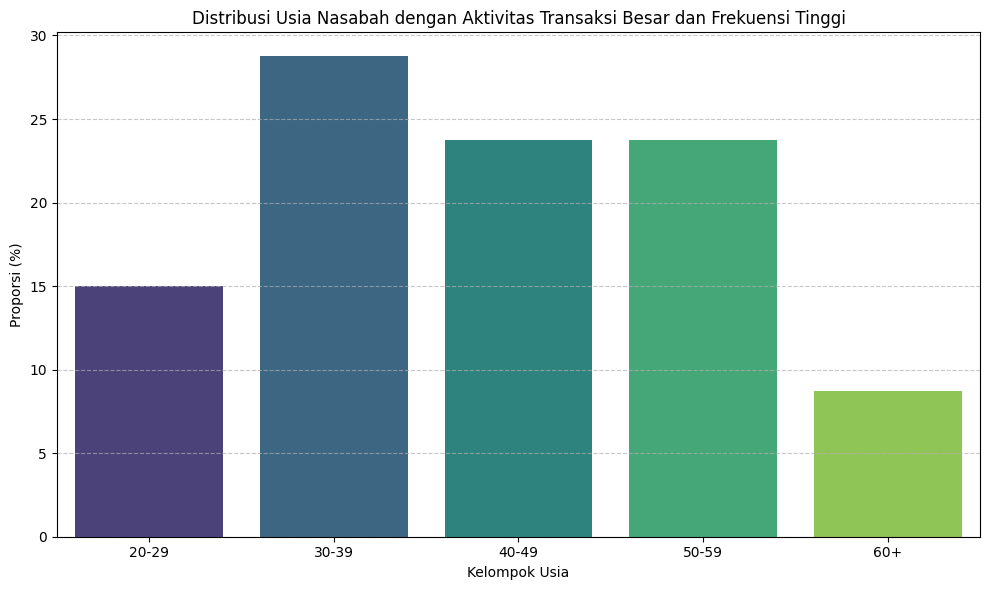

In [ ]:
age_distribution = pd.cut(
    nasabah_gokil['age'],
    bins=[20,30,40,50,60,100],
    labels=['20-29','30-39','40-49','50-59','60+'],
    right=False # Include the lower bound, exclude the upper bound
).value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, hue=age_distribution.index, palette='viridis', legend=False)
plt.title('Distribusi Usia Nasabah dengan Aktivitas Transaksi Besar dan Frekuensi Tinggi')
plt.xlabel('Kelompok Usia')
plt.ylabel('Proporsi (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

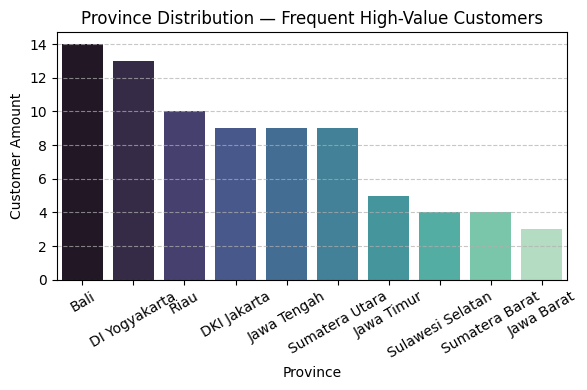

In [ ]:
province_distribution = nasabah_gokil['province'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=province_distribution.index, y=province_distribution.values, hue=province_distribution.index, palette='mako', legend=False)
plt.title('Province Distribution — Frequent High-Value Customers')
plt.xlabel('Province')
plt.ylabel('Customer Amount')
plt.xticks(rotation=30, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Insight:**

Profil demografis nasabah dengan aktivitas transaksi besar dan frekuensi tinggi menunjukkan distribusi gender yang relatif seimbang, dengan proporsi perempuan sedikit lebih tinggi (56,2%). Dari sisi usia, aktivitas ini terutama berasal dari kelompok usia produktif hingga matang, khususnya rentang 30–59 tahun. Secara geografis, nasabah tersebar di berbagai provinsi tanpa adanya dominasi wilayah yang ekstrem. Pola ini mengindikasikan bahwa aktivitas transaksi bernilai tinggi dan berfrekuensi tinggi pada segmen nasabah prioritas selaras dengan karakteristik demografis serta tingkat kematangan finansial mereka.

## Identifikasi nasabah potensi fraud

In [ ]:
potential_fraud = (
    df.groupby(['customer_id','full_name'])
      .agg(
          avg_transaction_customer=('amount', 'mean'),
          transaction_count=('amount', 'count')
      )
      .reset_index()
)

In [ ]:
potential_fraud = potential_fraud.merge(df[['customer_id', 'avg_balance']].drop_duplicates(), on='customer_id', how='left')

potential_fraud['transactions_vs_balance_ratio'] = potential_fraud['avg_transaction_customer'] / potential_fraud['avg_balance']
potential_fraud = potential_fraud[potential_fraud['transactions_vs_balance_ratio']>1]

potential_fraud.head()

,customer_id,full_name,avg_transaction_customer,transaction_count,avg_balance,transactions_vs_balance_ratio
4,C2_000006,Saiful Kuswoyo,4.184400e+08,3,120499593,3.472543
6,C2_000009,"Bakda Sihombing, S.Pd",3.581465e+08,1,348816375,1.026748
12,C2_000016,"R. Pranata Hardiansyah, S.Sos",3.145704e+08,1,83631684,3.761379
15,C2_000019,Maida Nurdiyanti,2.195663e+08,3,112025643,1.959965
20,C2_000024,Bagiya Puspasari,3.028864e+08,3,76643191,3.951902


In [ ]:
potential_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 4 to 2790
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    566 non-null    object 
 1   full_name                      566 non-null    object 
 2   avg_transaction_customer       566 non-null    float64
 3   transaction_count              566 non-null    int64  
 4   avg_balance                    566 non-null    int64  
 5   transactions_vs_balance_ratio  566 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 31.0+ KB


In [ ]:
potential_fraud.describe()

,avg_transaction_customer,transaction_count,avg_balance,transactions_vs_balance_ratio
count,5.660000e+02,566.000000,5.660000e+02,566.000000
mean,3.068609e+08,2.856890,1.766882e+08,2.153334
std,8.564577e+07,1.521183,8.828520e+07,1.225712
min,7.332132e+07,1.000000,5.020419e+07,1.000038
25%,2.496505e+08,2.000000,1.034179e+08,1.269910
50%,3.036567e+08,3.000000,1.645864e+08,1.701050
75%,3.650045e+08,4.000000,2.383610e+08,2.604510
max,4.953549e+08,12.000000,4.527671e+08,8.490118


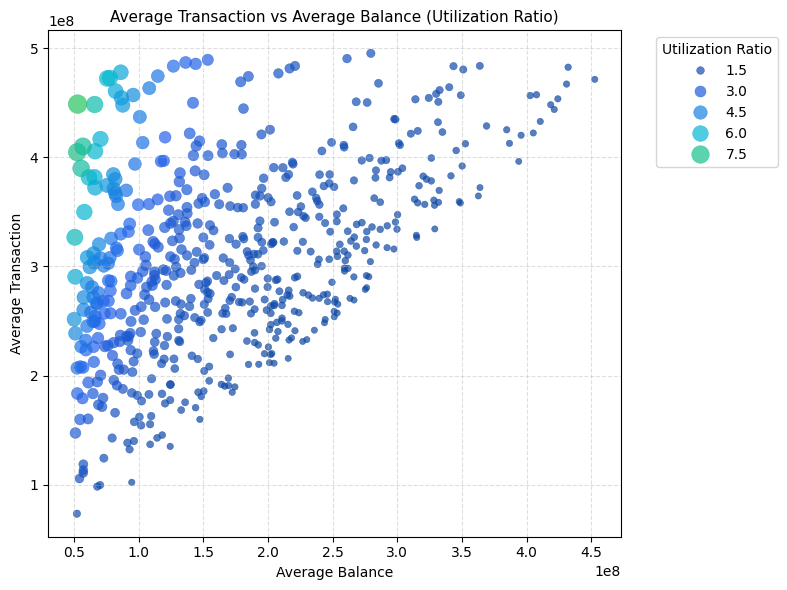

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: Navy → Blue → Teal → Green
custom_cmap = LinearSegmentedColormap.from_list(
    "blue_teal_green",
    ["#0D47A1", "#2563EB", "#06B6D4", "#22C55E"]
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=potential_fraud,
    x='avg_balance',
    y='avg_transaction_customer',
    hue='transactions_vs_balance_ratio',
    palette=custom_cmap,          # <- ini yang benar
    size='transactions_vs_balance_ratio',
    sizes=(20, 180),
    alpha=0.7,
    edgecolor=None
)

plt.title('Average Transaction vs Average Balance (Utilization Ratio)', fontsize=11)
plt.xlabel('Average Balance')
plt.ylabel('Average Transaction')
plt.legend(
    title='Utilization Ratio',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* **Insight:**

Hasil analisis menunjukkan bahwa terdapat 566 nasabah prioritas dengan rasio nilai transaksi terhadap rata-rata saldo di atas 1, yang mengindikasikan tingkat utilisasi dana yang relatif tinggi. Pola ini mencerminkan aktivitas transaksi yang intens dibandingkan saldo yang tersimpan, sehingga relevan untuk dimonitor lebih lanjut sebagai bagian dari pengawasan perilaku transaksi, namun tidak dapat secara langsung dikategorikan sebagai indikasi fraud.

# **Business Impact**

Analisis menunjukkan bahwa transaksi bernilai besar pada segmen nasabah prioritas terkonsentrasi pada sebagian kecil nasabah dengan profil finansial matang, tersebar lintas wilayah, serta melibatkan berbagai produk dan kanal. Tidak ditemukan anomali ekstrem secara statistik, meskipun terdapat sebagian nasabah dengan utilisasi dana tinggi yang ditunjukkan oleh rasio transaksi terhadap saldo rata-rata di atas 1. Temuan ini menegaskan bahwa pola tersebut umumnya wajar, namun tetap memerlukan pengawasan risiko berbasis profil dan perilaku agar sistem monitoring lebih kontekstual dan minim false positive.

# **Action Recommendation**

Bank disarankan menerapkan sistem monitoring berbasis profil dan perilaku pada nasabah prioritas, dengan memanfaatkan indikator utilisasi dana dan deviasi pola transaksi untuk meningkatkan akurasi pengawasan risiko serta meminimalkan false positive dalam pencegahan fraud.